<a href="https://colab.research.google.com/github/torrhen/data_science/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd

In [26]:
# original housing data
housing_data = [
    {'price' : 850000, 'rooms' : 4, 'neighborhood' : 'Queen Anne'},
    {'price' : 700000, 'rooms' : 3, 'neighborhood' : 'Fremont'},
    {'price' : 650000, 'rooms' : 3, 'neighborhood' : 'Wallingford'},
    {'price' : 600000, 'rooms' : 2, 'neighborhood' : 'Fremont'}
]

In [27]:
# create data frame from original data
housing_df = pd.DataFrame(housing_data)
print(housing_df)

    price  rooms neighborhood
0  850000      4   Queen Anne
1  700000      3      Fremont
2  650000      3  Wallingford
3  600000      2      Fremont


### One-hot encoding

Use to encode catergorical data without implying any algebraic relationship between class values.

In [28]:
from sklearn.feature_extraction import DictVectorizer

# create one-hot encodings for data as a list of dictionaries
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(housing_data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

For a large number of possible classes, one-hot encoding can greatly increase the size of the dataset.

However, sparse representations of the data are possible.

In [29]:
# the same data can be compressed as a sparse matrix for efficiency
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(housing_data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

Sparse inputs are still accepted by estimators for training and evaluating models.

### Text Features

A test dataset can be vectorized based on the frequency of each individual wor within samples. The count for each word become features of the dataset.

In [30]:
# original text data
text_data = ['anacondas live in the rainforest',
             'elephants live in the jungle']

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# convert text into numeric values using the frequency of words in each sample
vec = CountVectorizer()
data = vec.fit_transform(text_data)
# create dataframe
pd.DataFrame(data.toarray(), columns=vec.get_feature_names_out())

,anacondas,elephants,in,jungle,live,rainforest,the
0,1,0,1,0,1,1,1
1,0,1,1,1,1,0,1


One disadvantage of raw word count for classification probelms is that words that appear often have disproportionate influence on learning.

Some of these words may be shared by many unrelated documents and offer no meaning. E.g. "and", "is", "but".

TF-IDF looks to fix this by including the frequency of the words across all documnets and be invariant to misspelled words. 

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

'''
use term frequency inverse document frequency to weight each word count by
by how often it appears in the sample
'''
vec = TfidfVectorizer()
data = vec.fit_transform(text_data)
# create dataframe
pd.DataFrame(data.toarray(), columns=vec.get_feature_names_out())

,anacondas,elephants,in,jungle,live,rainforest,the
0,0.533098,0.000000,0.379303,0.000000,0.379303,0.533098,0.379303
1,0.000000,0.533098,0.379303,0.533098,0.379303,0.000000,0.379303


### Term Frequency - Inverse Document Frequency

#### Step 1 - TF

Calculate the frequency of words within each indiviual document (sample). (Bag of words)

$\text{TF} = \frac{\text{Frequency of each word in document}}{\text{Total words in document}}$

#### Step 2 - IDF

Calculate the number of occurences of each word across all possible documents (samples)

$\text{IDF} = log(\frac{\text{Total Documents}}{\text{Number of Documents containing word}})$

#### Step 3 - TF-IDF

Calculate TF-IDF for each word using steps 1 and 2.

$\text{TF-IDF} = TF \times IDF$

### Derived Features

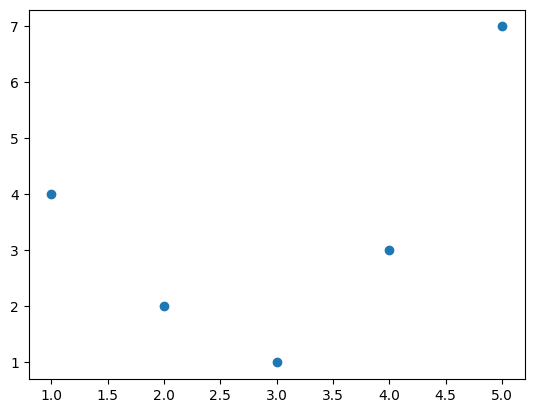

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# small dataset
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)

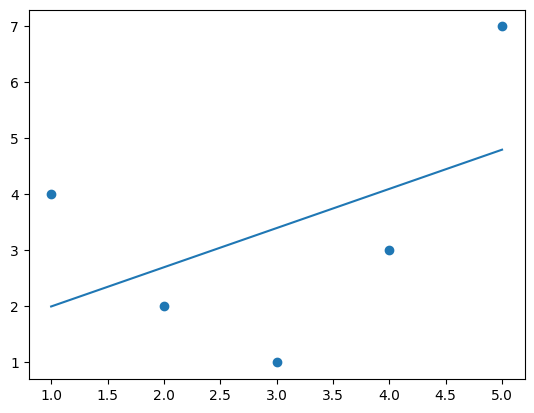

In [35]:
from sklearn.linear_model import LinearRegression

# add second dimension to input data
X = x[:, np.newaxis] # (5, 1)
# create linear regression model and fit to data
model = LinearRegression().fit(X, y)
# predict with the linear model 
y_preds = model.predict(X)
# plot original data
plt.scatter(x, y)
# plot predicted best fit line
plt.plot(x, y_preds)

We can transform input data for the model using basis functions.

E.g. a polynomial model is still a linear combination of the unknown parameters and non-linearly transformed features of $x$.

$y = {\beta}_{0} + {\beta}_{1}x + {\beta}_{2}{x}^{2} + {\beta}_{3}{x}^3$

Solve for ${\beta}_{i} \in \text{{0, 1, 2, 3}}$

In [40]:
from sklearn.preprocessing import PolynomialFeatures

# transform the data to include additional columns of polynomial feature values
p = PolynomialFeatures(degree=3, include_bias=False)
X_p = p.fit_transform(X)
# each column contains the power of x up to x^3
print(X_p)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


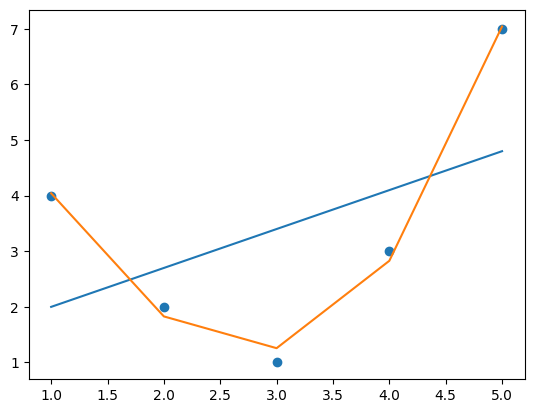

In [41]:
# create linear regression model and fit on additional polynomial features
model_p = LinearRegression().fit(X_p, y)
y_preds_p = model_p.predict(X_p)

# plot original data
plt.scatter(x, y)
# plot predicted best fit line from original dataset
plt.plot(x, y_preds)
# plot predicted best fit line using polynomial features
plt.plot(x, y_preds_p)

### Imputation of missing data

In [44]:
from numpy import nan

# simple dataset with missing values
X = np.array([[nan, 0,   3],
              [3,   7,   9],
              [nan, 5,   2],
              [4,   nan, 6],
              [8,   8,   1]])
# targets
y = np.array([14, 16, -1, 8, -5])

We can impute missing values to improve learning following simple strategies using the mean, mode or median of values from each feature.

In [45]:
from sklearn.impute import SimpleImputer

# replace missing values with the mean value for each feature
i = SimpleImputer(strategy='mean')
x_i = i.fit_transform(X)
print(x_i)

[[5. 0. 3.]
 [3. 7. 9.]
 [5. 5. 2.]
 [4. 5. 6.]
 [8. 8. 1.]]


In [46]:
# linear regression on filled data
model = LinearRegression().fit(x_i, y)
model.predict(x_i)

array([13.39262336, 14.5908862 , -1.51019637, 10.599572  , -5.0728852 ])

### Feature Pipelines

A processing pipeline can be created to automate the proprocessing and training of models on data.

In [49]:
from sklearn.pipeline import make_pipeline

# apply linear regression using polynomial features on missing data
pipeline = make_pipeline(SimpleImputer(strategy='mean'), # replace nan with mean
                         PolynomialFeatures(degree=2), # add x^2 polynomial features
                         LinearRegression())

In [53]:
# preprocess data and train model following pipeline steps
pipeline.fit(X, y)
# predict targets using pipeline
y_preds = pipeline.predict(X)
# compare real and predicted targets
print(y)
print(y_preds)

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
